### Transposed Direct Form-II IIR

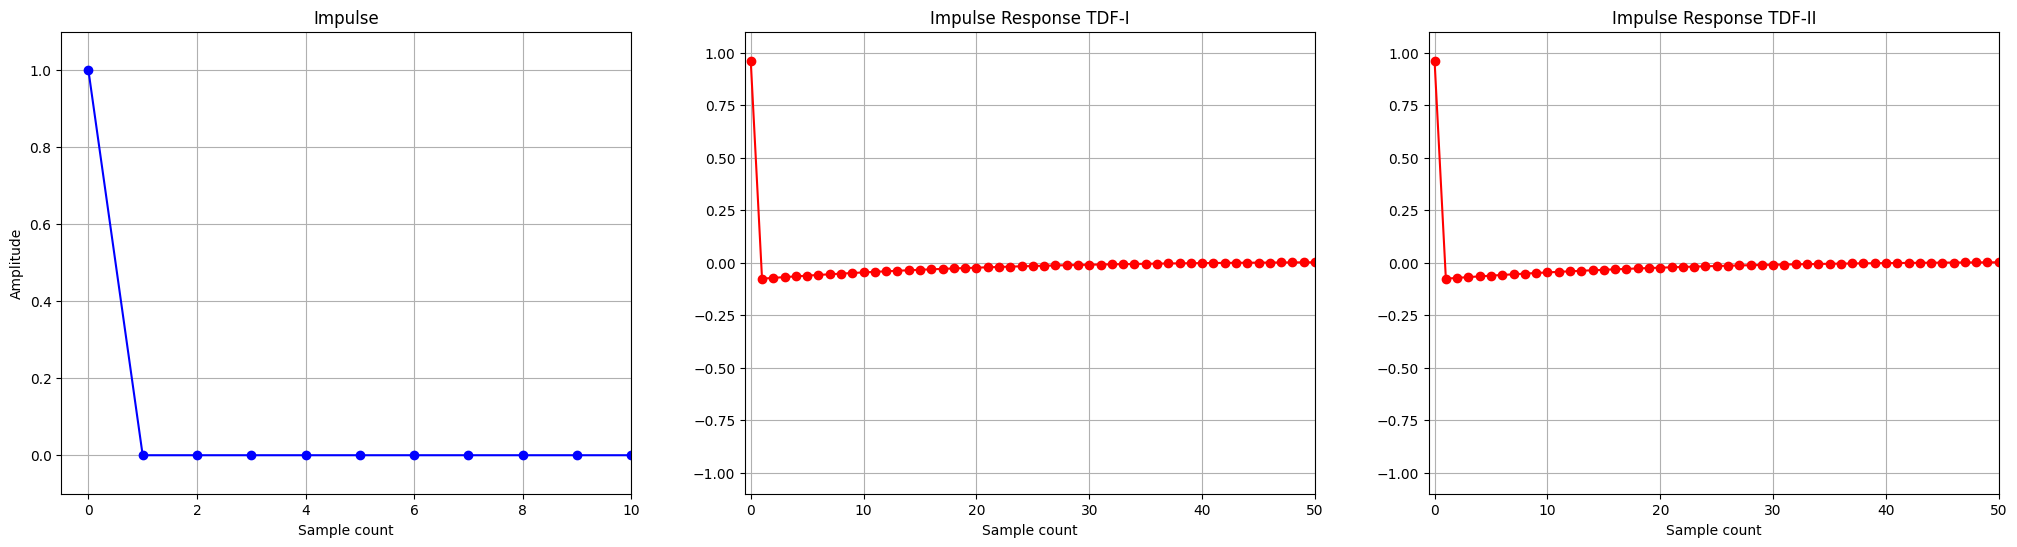

In [135]:
import numpy as np
import matplotlib.pyplot as plt

FRAME_SIZE = 2048

def TDF1(a0, a1, a2, b1, b2, x):
    y = np.zeros(x.size)
    for n in range(0, x.size):
        y[n] = a0*x[n] + a1*x[n-1] + a2*x[n-2] - b1*y[n-1] - b2*y[n-2]
    return y

def TDF2(a0, a1, a2, b1, b2, x):
    y = np.zeros_like(x)
    w1, w2 = 0, 0  # State variables (for previous states)
    for n in range(x.size):
        # Calculate the current state (intermediate variable)
        w0 = x[n] - b1 * w1 - b2 * w2
        # Compute the output using feedforward coefficients
        y[n] = a0 * w0 + a1 * w1 + a2 * w2
        # Update state variables for the next iteration
        w2 = w1
        w1 = w0
    
    return y

def plot_impulse_response(ax, impulse_response, title):
    ax.plot(impulse_response, 'ro-')
    ax.set_xlabel('Sample count')
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(-0.5, 50)
    ax.set_title(title)
    ax.grid(which='both', axis='both')

# a coefficients (zeros)
a0 = 0.961037921018842
a1 = -1.922075842037684
a2 = 0.961037921018842
# b coefficients (poles)
b1 = -1.920934496408946
b2 = 0.9232171876664218

# impulse signal (a single 1 followed by zeroes)
frameSize = 4028
impulse = np.zeros(frameSize)
impulse[0] = 1

impulse_response_tdf1 = TDF1(a0, a1, a2, b1, b2, impulse)
impulse_response_tdf2 = TDF2(a0, a1, a2, b1, b2, impulse)

# setup the plot
_, axes = plt.subplots(1, 3, figsize=(25,6))

# plot the impulse signal
ax = axes[0]
ax.plot(impulse, 'bo-')
ax.set_xlabel('Sample count')
ax.set_ylabel('Amplitude')
ax.set_ylim(-0.1, 1.1)
ax.set_xlim(-0.5, 10)
ax.set_title("Impulse")
ax.grid(which='both', axis='both')

# plot the impulse responses
plot_impulse_response(axes[1], impulse_response_tdf1, "Impulse Response TDF-I")
plot_impulse_response(axes[2], impulse_response_tdf2, "Impulse Response TDF-II")

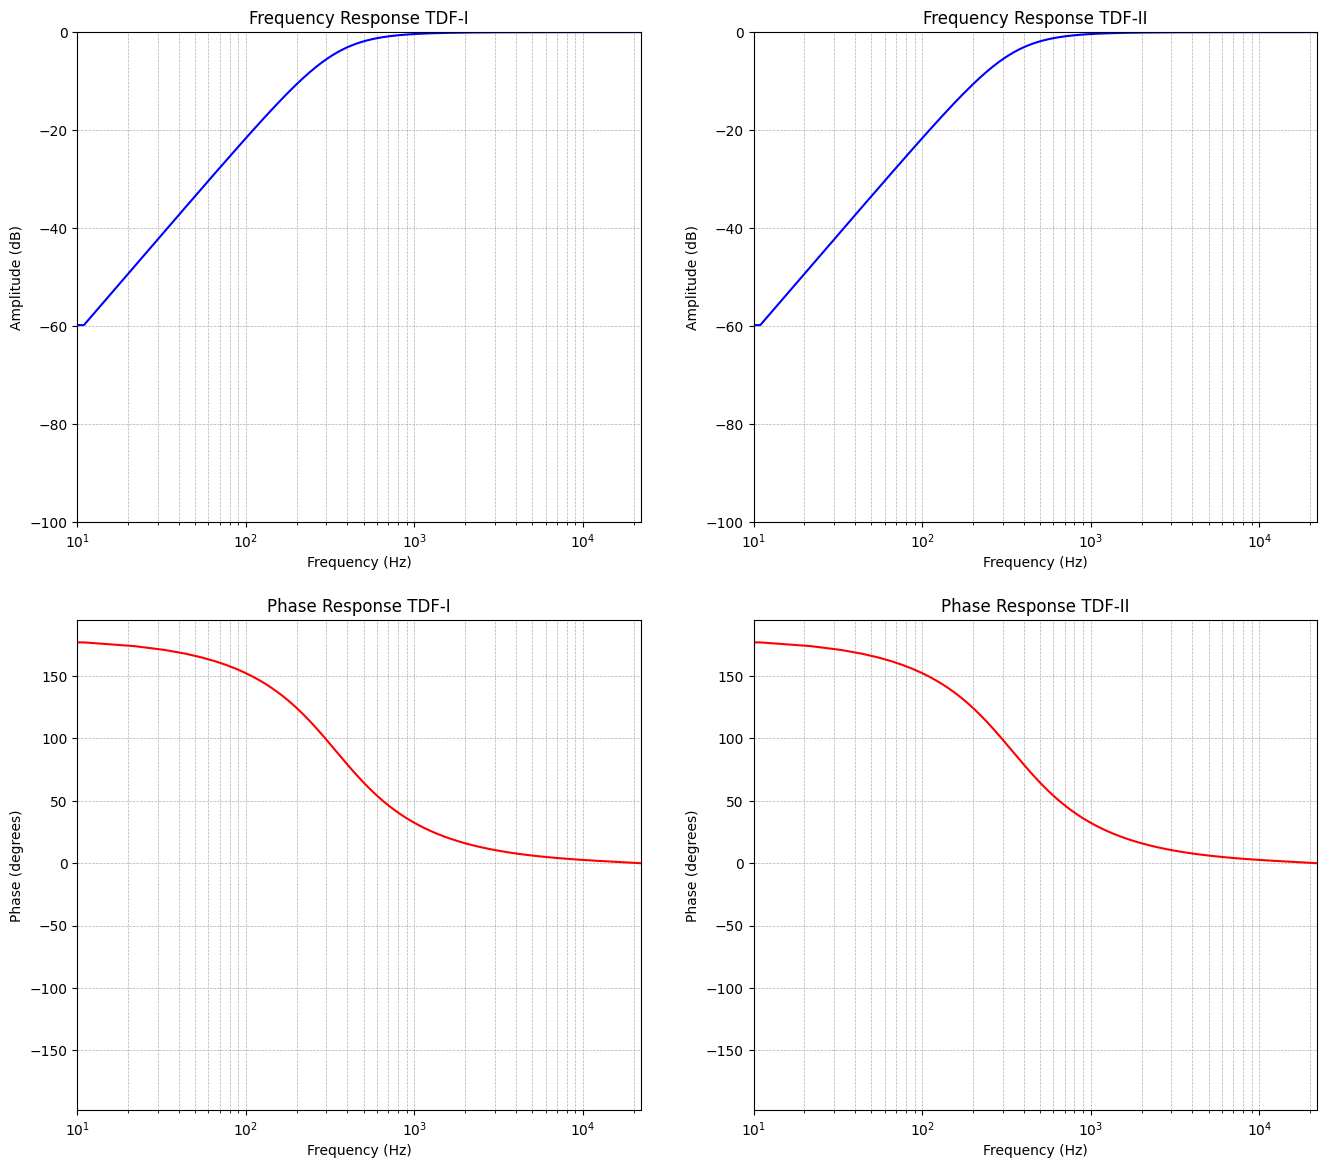

In [138]:
from scipy.fftpack import fft, fftfreq

SAMPLE_RATE = 44100

def get_response_data(impulse_response):
    spectrum = fft(impulse_response_tdf1)
    n = len(impulse_response)
    nyquist = n // 2
    frequencies = fftfreq(n, d=1/SAMPLE_RATE)[:nyquist]
    with np.errstate(divide='ignore'):
        magnitude_db = 20 * np.log10(np.abs(spectrum[:nyquist]))
    phase_degrees = np.degrees(np.angle(spectrum[:nyquist]))
    return frequencies, magnitude_db, phase_degrees

def plot_frequency_response(ax, frequencies, magnitude_db, title):
    ax.plot(frequencies, magnitude_db, 'b')
    ax.set_xscale('log')  # Set x-axis to logarithmic scale
    ax.set_xlabel('Frequency (Hz)')
    ax.set_xlim([10, SAMPLE_RATE/2])
    ax.set_ylabel('Amplitude (dB)')
    ax.set_ylim([-100, 0])
    ax.set_title('Frequency Response ' + title)
    ax.grid(True, which="both", ls="--", lw=0.5)

def plot_phase_response(ax, frequencies, phase_degrees, title):
    ax.plot(frequencies, phase_degrees, 'r')
    ax.set_xscale('log')  # Set x-axis to logarithmic scale
    ax.set_xlabel('Frequency (Hz)')
    ax.set_xlim([10, SAMPLE_RATE/2])
    ax.set_ylabel('Phase (degrees)')
    ax.set_title('Phase Response ' + title)
    ax.grid(True, which="both", ls="--", lw=0.5)

# Set up the plot
fig, axes = plt.subplots(2, 2, figsize=(16,14))

# Plot the frequency and phase response of TDF1
frequencies, magnitude_db, phase_degrees = get_response_data(impulse_response_tdf1)
plot_frequency_response(axes[0][0], frequencies, magnitude_db, "TDF-I")
plot_phase_response(axes[1][0], frequencies, phase_degrees, "TDF-I")

# Plot the frequency and phase response of TDF2
frequencies, magnitude_db, phase_degrees = get_response_data(impulse_response_tdf2)
plot_frequency_response(axes[0][1], frequencies, magnitude_db, "TDF-II")
plot_phase_response(axes[1][1], frequencies, phase_degrees, "TDF-II")

plt.show()